In [55]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [56]:
train_val_df = pd.read_csv('./MNIST/train.csv')
test_df = pd.read_csv('./MNIST/test.csv')

In [57]:
train_val_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
x_train_val_df, y_train_val_df = train_val_df.iloc[:,1:], train_val_df[['label']]
x_train_val_df.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
xtrain_df, xval_df, ytrain_df, yval_df = train_test_split(x_train_val_df, y_train_val_df, train_size = 0.8, shuffle=True)


In [60]:
print(len(xtrain_df), len(ytrain_df), len(xval_df), len(yval_df), len(test_df))

33600 33600 8400 8400 28000


In [61]:
import torch
import torch.nn.functional as F

In [62]:
from torch.utils.data import Dataset, DataLoader

class make_dataset(Dataset):
    def __init__(self, x_df, y_df):
        self.x_df = x_df
        self.y_df = y_df
        self.df_len = len(x_df)
    
    def __getitem__(self, idx):
        #sample = self.df.iloc[idx]
        image = self.x_df.iloc[idx]
        label = int(self.y_df.iloc[idx])
        #print(image.shape, type(image))
        image = image.to_numpy(dtype=np.uint8)
        image = np.reshape(image, (28,28))
        return {'label':label, 'image':image}
    def __len__(self):
        return self.df_len

In [63]:
train_dlo = make_dataset(xtrain_df, ytrain_df)
val_dlo = make_dataset(xval_df, yval_df)
#test_dlo = make_dataset(test_df)
batch_size = 16
train_dataloader = DataLoader(train_dlo, shuffle=False, pin_memory=False, batch_size=batch_size)
val_dataloader = DataLoader(val_dlo, shuffle=False, pin_memory=False, batch_size=batch_size)
#test_dataloader = DataLoader(test_dlo, shuffle=False, pin_memory=False, batch_size=16)


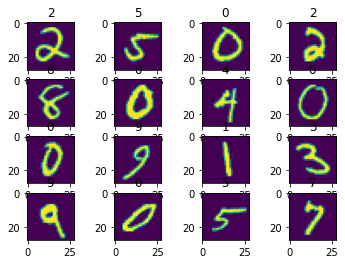

In [70]:
fig, axes = plt.subplots(4,4)
xx, yy = 0, 0
for i,xbatch in enumerate(train_dataloader):
    for j in range(batch_size):
        image = xbatch['image'][j]
        label = xbatch['label'][j]
        axes[xx,yy].imshow(image)
        axes[xx,yy].set_title(str(int(label))) 
        yy += 1
        if yy == 4:
            xx += 1
            yy = 0
    break

plt.show()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F 

class CNNmodel(torch.module):
    def __init__(self):
        super(CNNmodel, self).__init__()
        self.input_layer = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3,3),stride=(1,1))
        self.maxpool_1 = nn.MaxPool2d(kernel_size = (2, 2), stride=(2, 2))
        self.conv2d_2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3),stride=(1,1))
        self.maxpool_2 = nn.MaxPool2d(kernel_size = (2, 2), stride=(2, 2))
        self.flatten = nn.Flatten()
        self.dense1 = nn.Linear(in_features=, out_features=10)
        self.dense2 = 
    
    def forward(self, x):
        x1 = self.conv2d_2(self.maxpool_1(self.input_layer(x)))
        x1 = F.self.dense1(self.flatten(self.maxpool_2(x1)))


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.8)
print('Initial lr set at optimizer = 0.8')
lrchanger=lr_scheduler.ConstantLR(optimizer, factor=0.05, total_iters=7, last_epoch=-1, verbose=True)
model_ft = train_model(model, criterion, optimizer, lrchanger, num_epochs=12)

'''Decays lr by a constant value = 'factor' for ('total_iters' -1 ) number of epochs'''